# Cancer Data - Classification

Kaggle source data: [dataset](https://www.kaggle.com/datasets/erdemtaha/cancer-data)


570 geometric characteristics cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant

Our cancer data contains 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.features import Rank2D, RadViz, ParallelCoordinates
from scipy.stats import shapiro

import warnings

warnings.filterwarnings('ignore')
plt.style.use('bmh')

## Import and Load

In [117]:
#Load data
orig_data = pd.read_csv('../data/raw/cancer_data.csv')

In [118]:
orig_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Missing values and duplicated

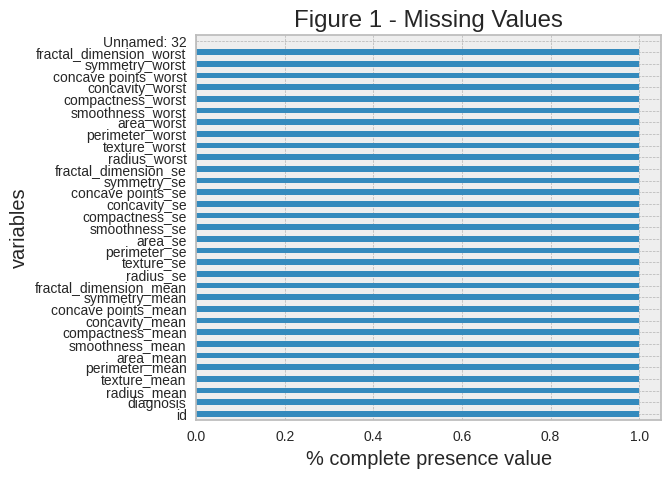

In [119]:
fig, ax = plt.subplots(figsize=(6,5))
(1- orig_data.isnull().mean()).abs().plot.barh(ax=ax)
plt.title('Figure 1 - Missing Values')
plt.xlabel('% complete presence value')
plt.ylabel('variables')
fig.savefig('../reports/figures/fig1-missing-values', dpi=300, bbox_inches='tight')

In [120]:
# verify duplicated
orig_data.duplicated().sum()

0

* Don't have NA and duplicated values. Next step, I will remove the columns id and Unamed:

In [121]:
# Removing the columns id and Unnamed and save on new dataframe
data = orig_data.drop(['id', 'Unnamed: 32'], axis=1)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


I'm changing the variable target diagnosis:  
M - 1  
B - 0

In [122]:
# Converting 'diagnosis'
data.diagnosis = data.diagnosis.apply(lambda x: 1 if x=='M' else 0)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Summarize Statistics:

In [123]:
summarize = data.describe()
summarize.T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


### About distributions

- To verify all distributions, I'll apply a Shapiro-Wilk statistical test to check if they follow a normal distribution.

    * The null hypothesis of the test is that the data is normally distributed, while the alternative hypothesis is that the data is not normally distributed.


In [124]:
# Verify to all columns Shapiro-Wilk test, print just the variable that we can reject the H0: 
for col in data.columns:
    stat, p = shapiro(data[col])
    if p >= 0.05:
        print(f'{col}:p-value = {p:.6f}')


* We can see that there are no columns above with a Shapiro test p-value grater than 5%. This likely indicates strong evidence to reject the null hypothesis (H0) that the data is normally distributed.

In the following steps, we'll verify some example of these this distributions to view the skewness and kurtosis. 

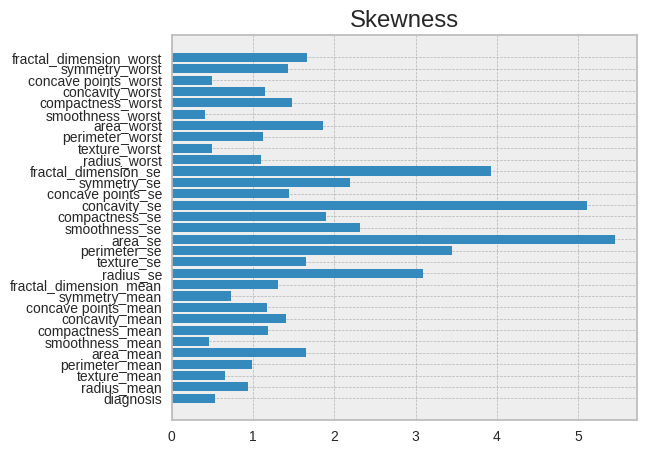

In [125]:
# compute skewness and kurtosis of all variables
fig, ax = plt.subplots(figsize=(6,5))
plt.barh(data.skew().index, data.skew().values)
plt.title('Skewness')
plt.show()
fig.savefig('../reports/figures/fig2-skewness', dpi=300, bbox_inches='tight')

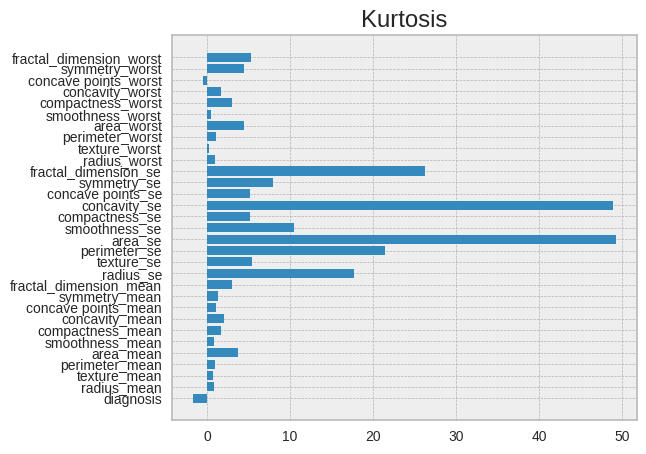

In [126]:
fig, ax = plt.subplots(figsize=(6,5))
plt.barh(data.kurtosis().index, data.kurtosis().values)
plt.title('Kurtosis')
plt.show()
fig.savefig('../reports/figures/fig3-kurtosis', dpi=300, bbox_inches='tight')

To create a visualization about distribution, I'll use a violin plot to subsets groups:  
    * Group A : 0 > mean <=1  
    * Group B : 1 > mean <=20  
    * Group C : 20 > mean <=100  
    * Group D : 100 > mean <= 1000 

In [127]:
def create_groups(summarize):
    """
    Creates groups based on the mean values in a pandas DataFrame.

    Args:
        summarize (pandas.DataFrame): A DataFrame containing summary statistics.

    Returns:
        pandas.DataFrame: A new DataFrame with an additional 'group' column, which categorizes
                           the means into one of four groups (A, B, C, or D) based on the following
                           cutoffs: 0 < mean <= 1 (A), 1 < mean <= 20 (B), 20 < mean <= 100 (C),
                           and mean > 100 (D).
    """
    df = pd.DataFrame(summarize.loc['mean'])
    df['group'] = pd.cut(df['mean'],
                         [0, 1, 20, 100, 1000],
                         labels=['A','B','C','D'])
    return df


In [128]:
grouped_data = create_groups(summarize)
print(grouped_data.group.value_counts())

# Subset the group A to a A-A and A-B to construct a plots:
group_A_A = grouped_data.query("group == 'A'")[:10]
group_A_B = grouped_data.query("group == 'A'")[10:20]
group_B = grouped_data.query("group == 'B'")
group_C = grouped_data.query("group == 'C'")
group_D = grouped_data.query("group == 'D'")

# Mapping list index groups
list_group = [
    list(group_A_A.index.values),
    list(group_A_B.index.values),
    list(group_B.index.values),
    list(group_C.index.values),
    list(group_D.index.values)
]

group
A    20
B     5
C     3
D     3
Name: count, dtype: int64


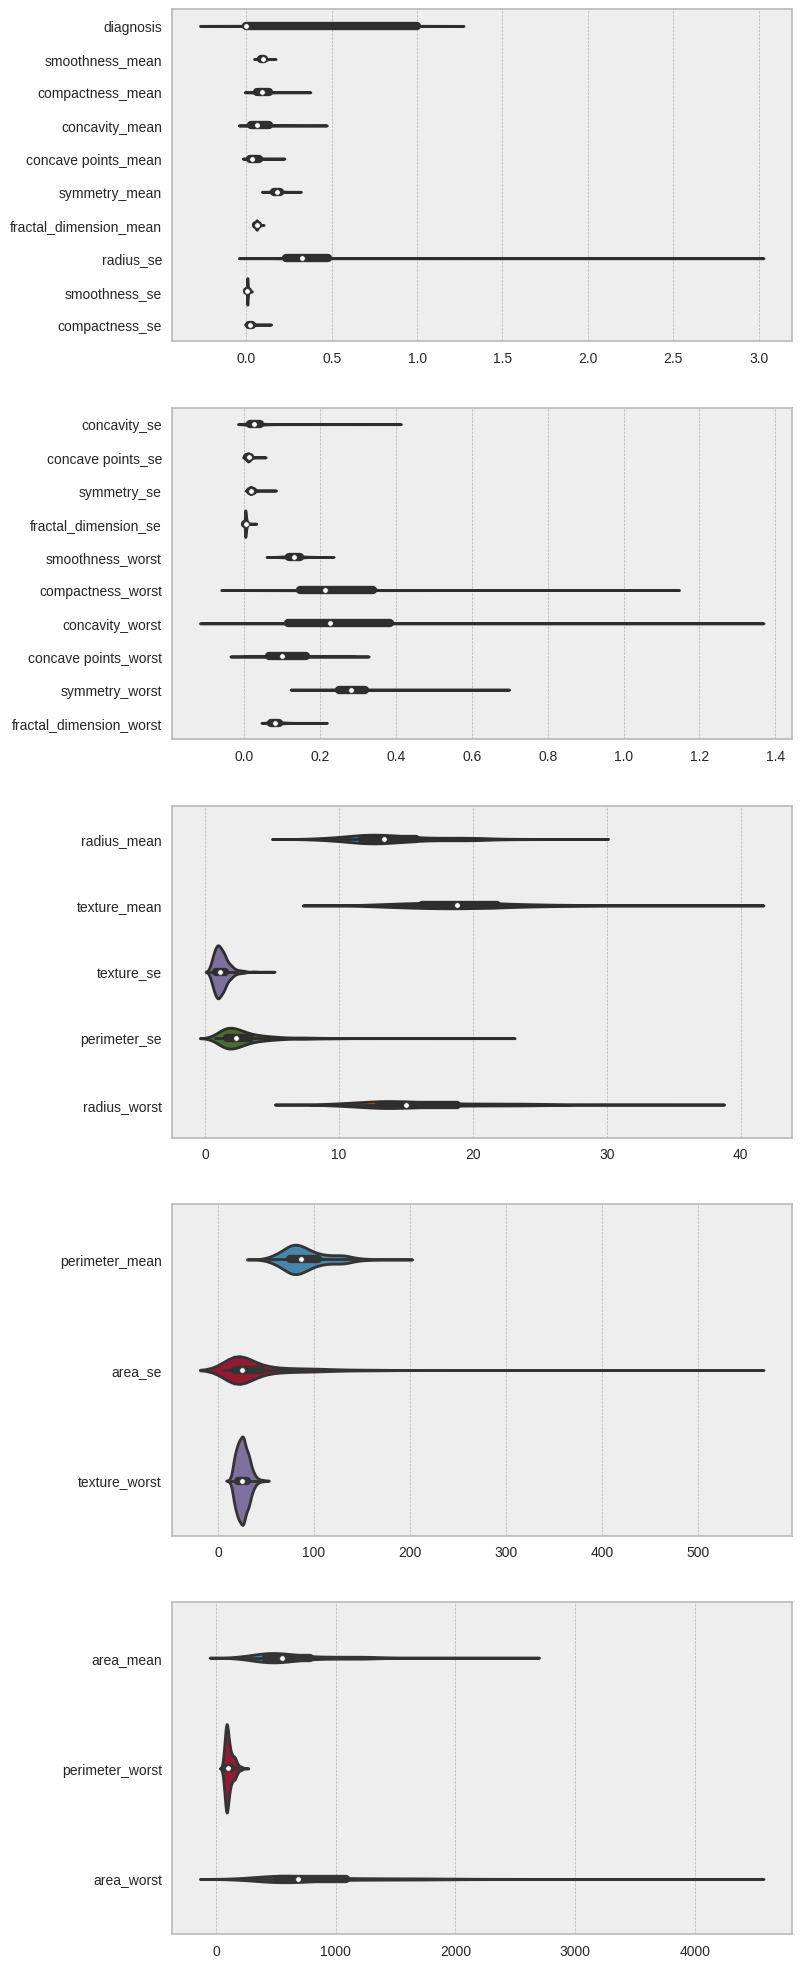

In [129]:
fig, axs = plt.subplots(5, figsize=(8,25))

for index in range(len(list_group)):
    row = index
    sns.violinplot(data=data[list_group[index]], ax=axs[row], orient='horizontal')

plt.show()
fig.savefig('../reports/figures/features-violin-plot', dpi=300, bbox_inches='tight')

### About Correlations:

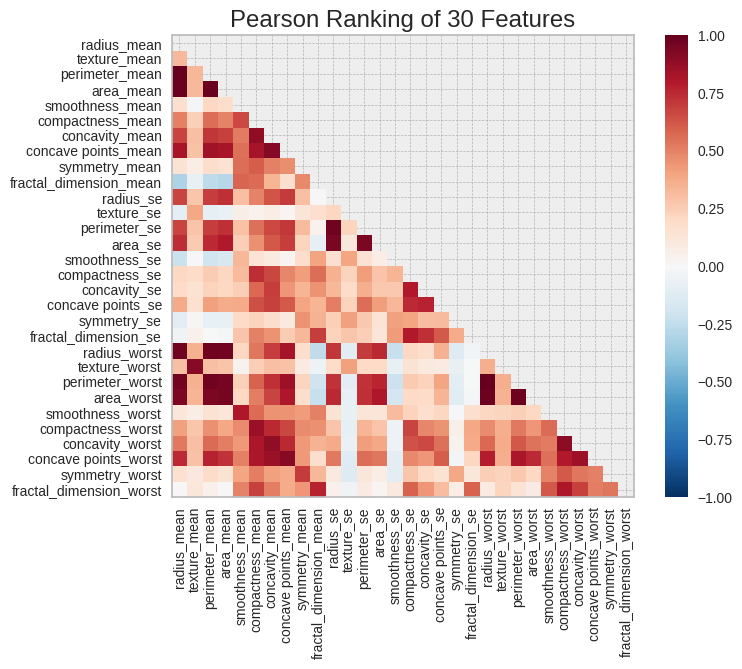

In [130]:
# plot heatmap by yellowbrick
fig, ax = plt.subplots(figsize=(8,6))
pcv = Rank2D(
    features= data.drop('diagnosis', axis=1).columns,
    algorithm="pearson"
    )

pcv.fit(data.drop('diagnosis', axis=1), data.diagnosis)
pcv.transform(data.drop('diagnosis', axis=1))
pcv.show()
fig.savefig('../reports/figures/heat-map-correlations', dpi=300, bbox_inches='tight')

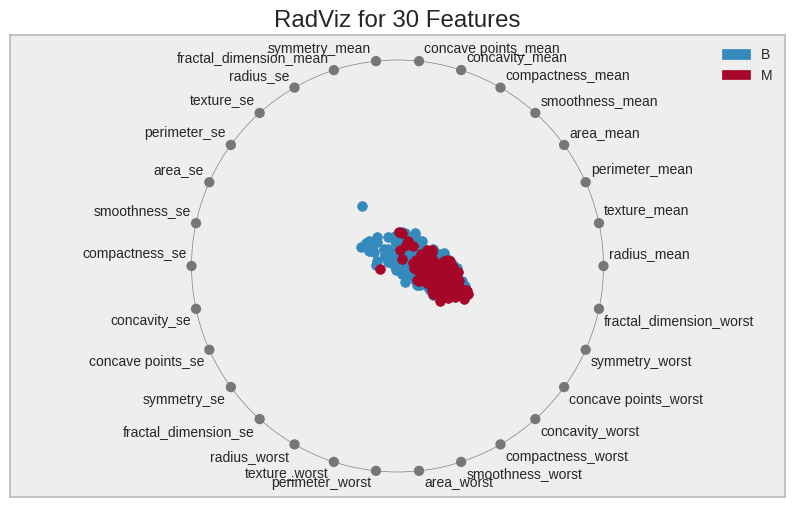

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
rv = RadViz(
      classes = ['B', 'M'],
      features= data.drop('diagnosis', axis=1).columns,
)
    
rv.fit_transform(data.drop('diagnosis', axis=1), data.diagnosis)
rv.poof()
fig.savefig('../reports/figures/radviz-30-features')


We can note that most feature have strong correlations because all the information is linked with one geometric characteristic of the cell.  

A strong feature correlation can affect the performance of some algorithms of machine learning. In the notebook about preprocessing we will apply a feature selection to try reduce this impact. 

In [132]:

def correlated_columns(df, threshold=0.95):
    """
    Returns a pandas DataFrame containing pairs of columns in the input DataFrame `df` that have a Pearson correlation
    coefficient greater than `threshold`. The returned DataFrame has three columns: 'level_0', 'level_1', and 'pearson'.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing columns to check for correlation.
        
    threshold : float, optional (default=0.95)
        Threshold value for the absolute value of the Pearson correlation coefficient. Any pair of columns with a 
        correlation coefficient greater than `threshold` will be included in the output DataFrame.
        
    Returns:
    --------
    result_df : pandas DataFrame
        DataFrame containing pairs of columns in `df` with a Pearson correlation coefficient greater than `threshold`.
        The 'level_0' and 'level_1' columns contain the names of the correlated columns, and the 'pearson' column contains
        the corresponding Pearson correlation coefficients.
    """
    corr_matrix = df.corr()
    lower_triangle = np.tril(corr_matrix, k=-1)
    stacked_df = pd.DataFrame(lower_triangle, columns=df.columns, index=df.columns).stack()
    filtered_df = stacked_df.rename('pearson').loc[lambda x: abs(x) > threshold]
    result_df = filtered_df.reset_index().query('level_0 != level_1')
    return result_df


In [140]:
correleted_columns = correlated_columns(data.drop('diagnosis', axis=1))
correleted_columns.to_markdown

<bound method DataFrame.to_markdown of             level_0          level_1   pearson
0    perimeter_mean      radius_mean  0.997855
1         area_mean      radius_mean  0.987357
2         area_mean   perimeter_mean  0.986507
3      perimeter_se        radius_se  0.972794
4           area_se        radius_se  0.951830
5      radius_worst      radius_mean  0.969539
6      radius_worst   perimeter_mean  0.969476
7      radius_worst        area_mean  0.962746
8   perimeter_worst      radius_mean  0.965137
9   perimeter_worst   perimeter_mean  0.970387
10  perimeter_worst        area_mean  0.959120
11  perimeter_worst     radius_worst  0.993708
12       area_worst        area_mean  0.959213
13       area_worst     radius_worst  0.984015
14       area_worst  perimeter_worst  0.977578>

In [134]:
# Create a second dataset data2 with contain the drop about correlated columns level1
data2 = data.drop(correleted_columns.level_1.unique(), axis=1)

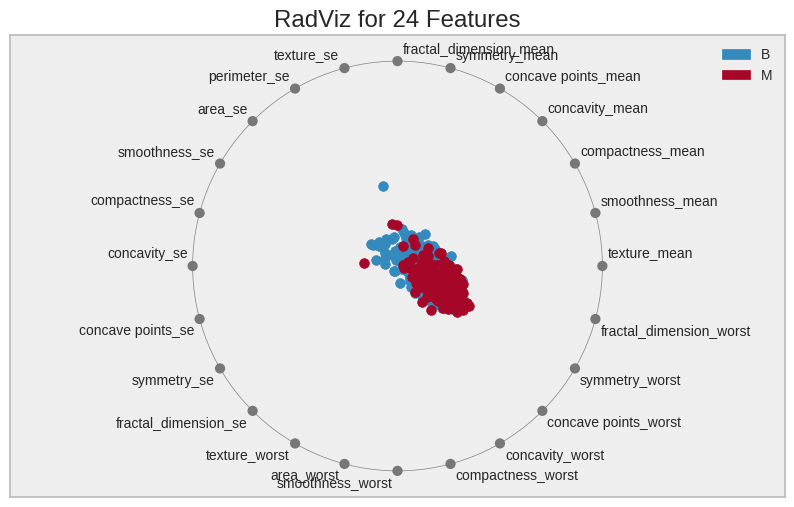

<Figure size 800x550 with 0 Axes>

In [135]:
# plotting a RadViz by yellowbrick
fig, ax = plt.subplots(figsize=(10,6))
rv = RadViz(
      classes = ['B', 'M'],
      features= data2.drop('diagnosis', axis=1).columns,
)
    
rv.fit_transform(data2.drop('diagnosis', axis=1), data2.diagnosis)
rv.poof()
plt.savefig('../reports/figures/radviz-24-features', dpi=300, bbox_inches='tight')

### About balancing classes of target

In [136]:
def plot_balanced_class(series):
    """
    Create a balanced class plot (bar chart) of a given pandas series.
    
    Parameters:
    series (pandas.core.series.Series): A pandas series containing data to plot
    
    Returns:
    None
    """
    value_counts = series.value_counts()
    percentages = value_counts / len(series) * 100
    colors = sns.color_palette('colorblind')
    plt.figure(figsize=(6,4))
    plt.bar(value_counts.index, value_counts.values, color=colors)
    
    # add percentage labels to each bar
    for i, count in enumerate(value_counts):
        percentage = round(percentages[i], 2)
        plt.text(i, count + 0.5, f'{percentage}%', ha='center', fontsize=10)

    # set the title and axis labels
    plt.title('Balanced Class Plot to:'+ series.name)
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.savefig('../reports/figures/balance_'+series.name, dpi=300, bbox_inches='tight')
    plt.show()

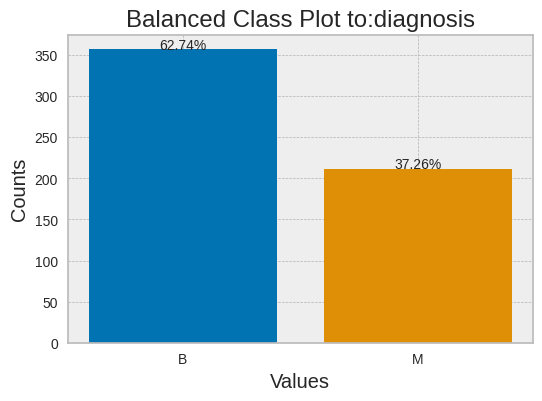

In [137]:
plot_balanced_class(orig_data.diagnosis)

## Save transformed Data

In [138]:
data.to_csv('../data/interim/data.csv', index=False)

In [139]:
data2.to_csv('../data/interim/data2.csv', index=False)

# END